<h1>Analyzing type of movies/series added in Netflix by year</h1>
<br>
<p>Our goal is to determine the type and characteristics of the movies and shows that Netflix added each year for 2008 to 2021</p>
<p>Data source: Kaggle dataset csv file in <a>https://www.kaggle.com/shivamb/netflix-shows</a></p>

In [105]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#load dataset
data = pd.read_csv('netflix_titles.csv')
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


<p>All columns are text, except for realease year, which is an integer.</p>
<p>We will have to change the type of date_added to a date format, and duration to a integer format.</p> 
<p>Columns of director and cast have a lot of missing data, we will probably drop these columns</p>

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<p>Converting date_added column to a datetime object.</p>

In [108]:
#Converting date_added column to a datetime object.
data['datetime_added'] = pd.to_datetime(data['date_added'], infer_datetime_format=True)
data['datetime_added'].tail()

7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: datetime_added, dtype: datetime64[ns]

<p>Change duration column to integer</p>

In [109]:
data['duration_int'] = data['duration'].str.split(' ').str[0].astype('int')
data['duration_int'].tail()

7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration_int, dtype: int64

<h2>Total shows added to Netflix each year</h2>
<h5>Strong growth since 2015, but 2020 was the first year in which the number of shows decreased compared to the previous year.</h5>

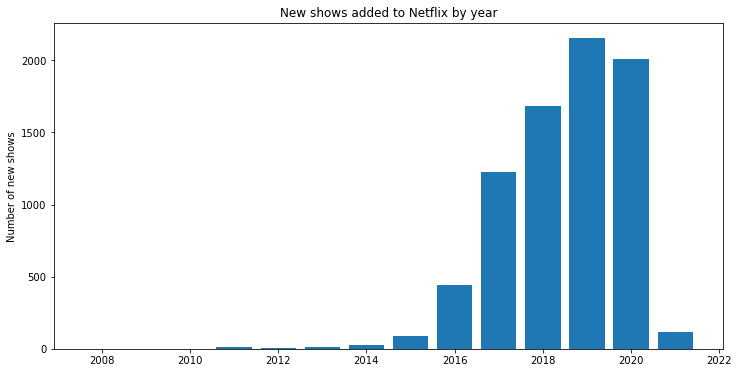

In [110]:
tot_add_by_year = pd.DataFrame([])
tot_add_by_year['new_shows'] = data['show_id'].groupby(data['datetime_added'].dt.year).agg('count')
#print(tot_add_by_year)

plt.figure(figsize=(12, 6))
plt.bar(tot_add_by_year.index, tot_add_by_year['new_shows'])
plt.title('New shows added to Netflix by year')
plt.ylabel('Number of new shows')
#plt.yscale('log')
plt.show()

<h2>Netflix shows by category</h2>
<h5>By category, most show on Netflix are Documentaries, Stand-up comedies and international movies (drama and comedies)</h5>

In [111]:
data['listed_in'].value_counts()[0:5]

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Name: listed_in, dtype: int64

<h2>Which countries add more content to Netflix?</h2>
<h5>The USA is by far the country that adds more shows to Netflix, followed by India and the UK.</h5>
<h5>Egypt and Mexico have grown recently</h5>

In [112]:
#Determine shows added by country each year.
year_country_table = pd.pivot_table(data, values='show_id', index=[data['datetime_added'].dt.year], columns=['country'], \
                              aggfunc='count', fill_value=0).T

year_country_table['total_shows'] = year_country_table.sum(axis=1)
year_country_table = year_country_table.sort_values(by='total_shows', ascending=False)

top_ten_countries = year_country_table.iloc[0:10]
print('TOP 10 COUNTRIES ADDING SHOWS ON NETFLIX')
top_ten_countries

TOP 10 COUNTRIES ADDING SHOWS ON NETFLIX


datetime_added,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,total_shows
country,,,,,,,,,,,,,,,
United States,2,1,1,12,2,8,16,52,159,369,463,731,678,55,2549
India,0,0,0,0,0,0,0,0,11,143,340,225,192,12,923
United Kingdom,0,0,0,0,0,0,0,3,37,95,77,107,74,3,396
Japan,0,0,0,0,0,0,0,1,17,35,39,62,70,1,225
South Korea,0,0,0,0,0,0,0,0,9,41,25,58,49,1,183
Canada,0,0,0,0,0,1,1,4,13,35,32,40,51,0,177
Spain,0,0,0,0,0,0,0,0,11,24,30,40,28,1,134
France,0,0,0,0,0,0,0,2,8,17,25,31,30,2,115
Egypt,0,0,0,0,0,0,0,0,0,0,1,53,47,0,101


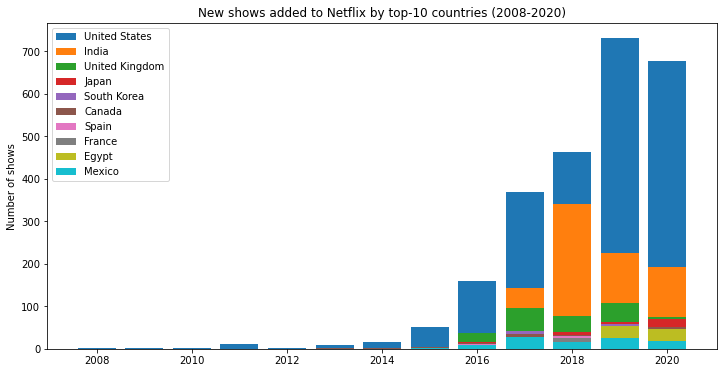

In [113]:
shows_per_country_to_plot = top_ten_countries.drop([2021.0, 'total_shows'], axis=1).T
#shows_per_country_to_plot = shows_per_country_to_plot.iloc[:, ::-1]

fig, ax = plt.subplots(figsize=(12,6))
for country in shows_per_country_to_plot.columns:
    ax.bar(shows_per_country_to_plot.index, shows_per_country_to_plot[country], label=country)

ax.legend()
plt.title('New shows added to Netflix by top-10 countries (2008-2020)')
plt.ylabel('Number of shows')
plt.show()


<h2>What kind of content adds every one of these countries?</h2>
<ul>
    <li>USA: Documentaries and stand-up comedy.</li>
    <li>India: Drama and comedy movies. </li>
    <li>UK: Documentaries, TV shows and reality TV. </li>
    <li>Japan: Animes </li>
    <li>South Korea: Romantic TV shows </li>
    <li>Canada: Family movies and kids' TV shows </li>
    <li>Spain: Crime TV shows </li>
    <li>France: kids's TV shows and documentaries </li>
    <li>Egypt: Comedy Movies </li>
    <li>Mexico: Stand-up comedy and crime TV shows </li>
<ul>

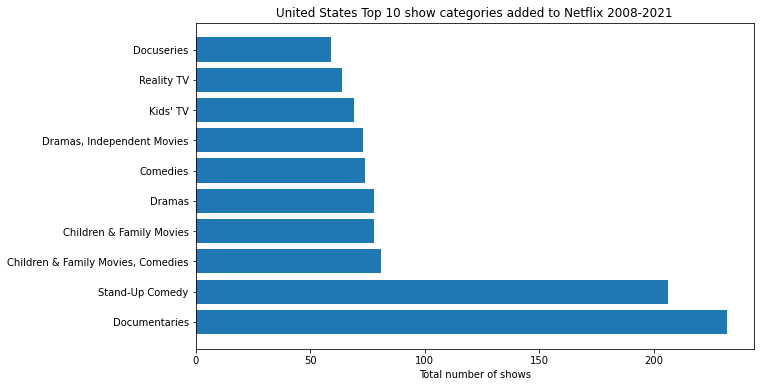

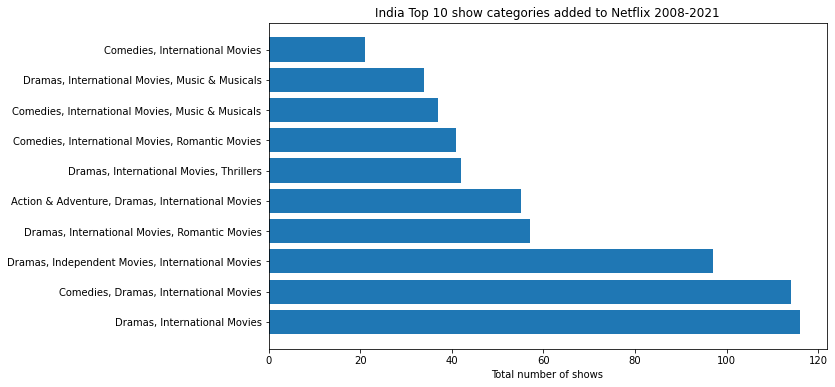

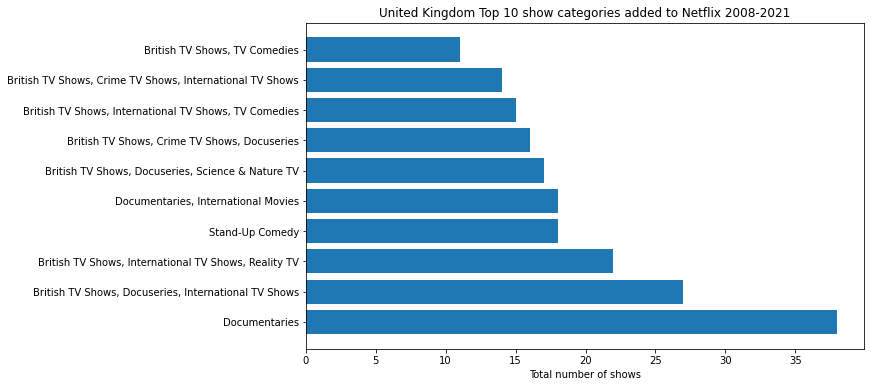

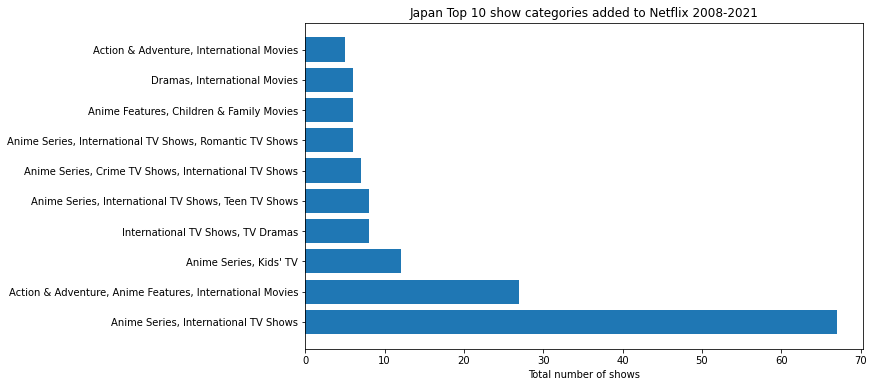

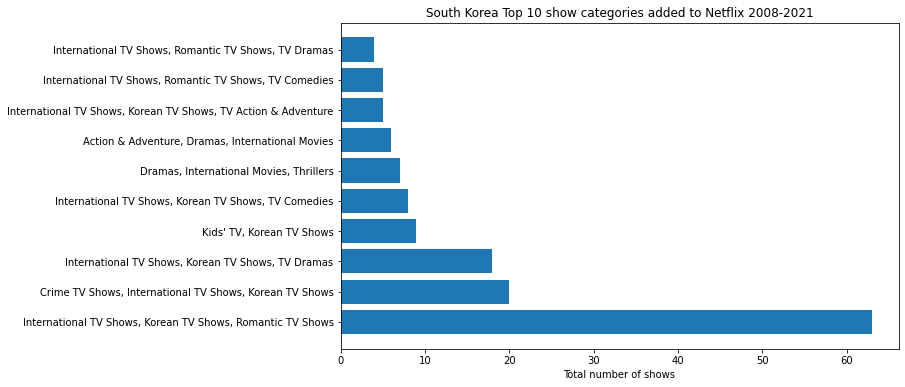

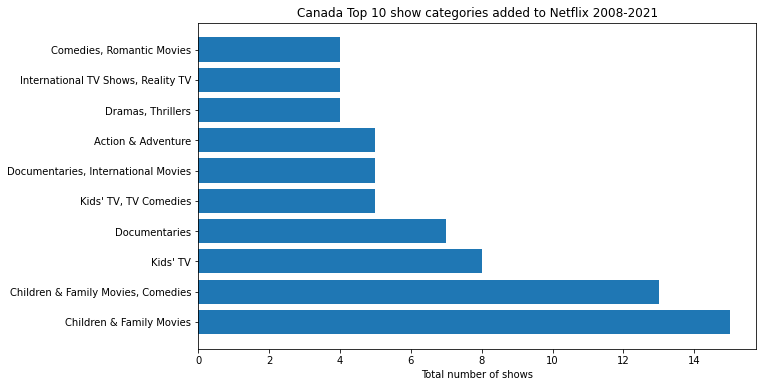

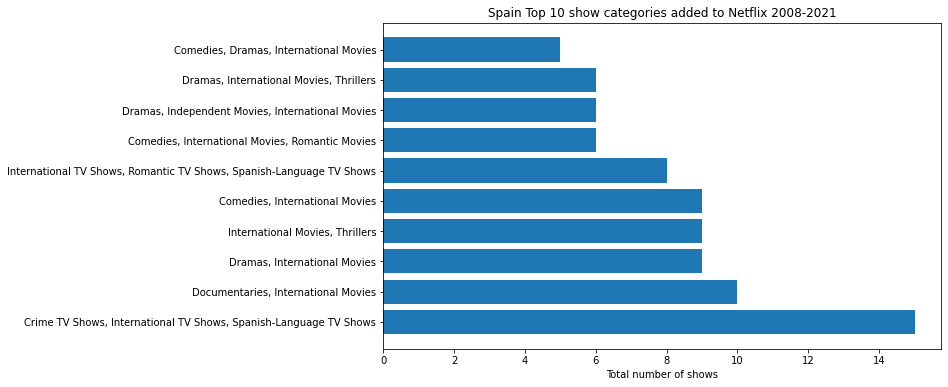

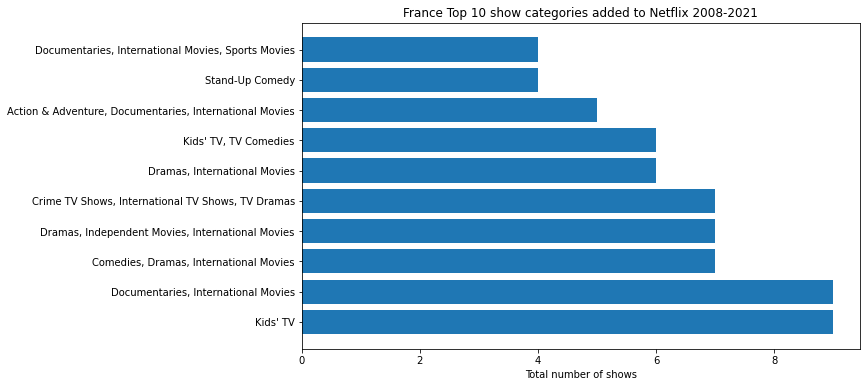

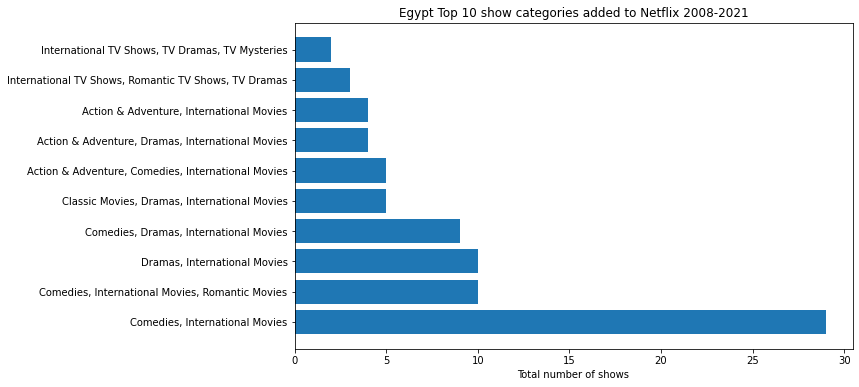

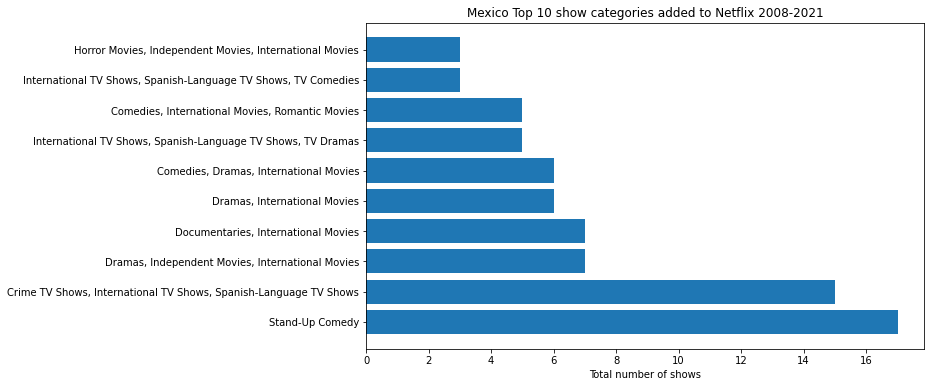

In [114]:
country_listed_in_table = pd.pivot_table(data, values='show_id', index='country', columns='listed_in', \
                                         aggfunc='count', fill_value = 0)
country_listed_in_table['total_shows'] = country_listed_in_table.sum(axis=1)
country_listed_in_table = country_listed_in_table.sort_values(by='total_shows', ascending=False)


def plot_show_category_count(country_list):
    '''Plots an horizontal bar chart of the top ten show categories by countries given in a list'''
    for country in country_list:
        country_show_category = country_listed_in_table.loc[country].sort_values(ascending=False)
        
        plt.figure(figsize=(10,6))
        plt.barh(country_show_category.index[1:11], country_show_category[1:11])
        plt.title('{} Top 10 show categories added to Netflix 2008-2021'.format(country))
        plt.xlabel('Total number of shows')
        plt.show()

plot_show_category_count(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Egypt', 'Mexico',])

<h2>Release year of shows added to Netflix</h2>
<h6>Netflix has added a lot more of old movies since 2016</h6>

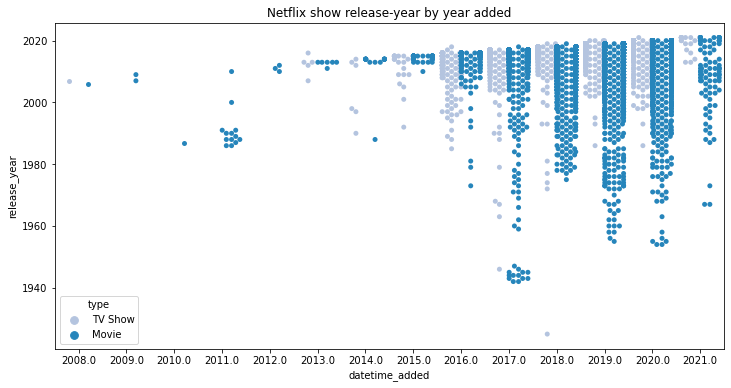

In [115]:
#swarn plot of shows release year.
plt.figure(figsize=(12,6))
plt.title('Netflix show release-year by year added')
sns.swarmplot(x=data['datetime_added'].dt.year, y='release_year', data=data, hue='type', palette="PuBu", dodge=True)
plt.show()

<h2>Show duration by type</h2>
<h6>Most TV shows just last 1 season, and movies tend to last longer in recent years</h6>

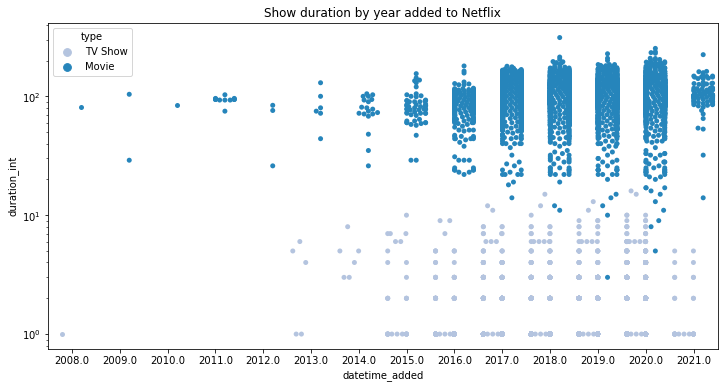

In [116]:
#swarn plot of duration of shows added by year
plt.figure(figsize=(12,6))
plt.title('Show duration by year added to Netflix')
sns.swarmplot(x=data['datetime_added'].dt.year, y='duration_int', data=data, hue='type', palette="PuBu", dodge=True)
plt.yscale('log')
#plt.axhline(data['duration_int'].median(), c='orange')
plt.show()

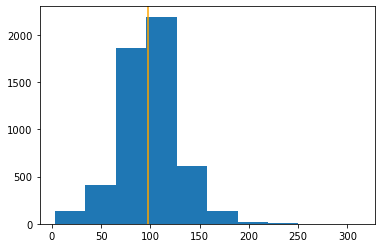

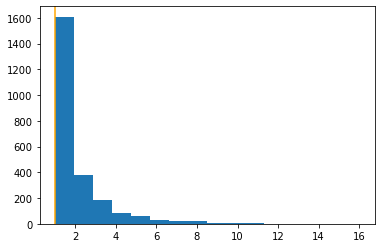

In [117]:
duration_type = data[['type', 'duration_int']]
duration_tvshow = duration_type[duration_type['type'] == 'TV Show']
duration_movie = duration_type[duration_type['type'] == 'Movie']

plt.hist(duration_movie['duration_int'])
plt.axvline(duration_movie['duration_int'].median(), c='orange')
plt.show()

plt.hist(duration_tvshow['duration_int'], bins=16)
plt.axvline(duration_tvshow['duration_int'].median(), c='orange')
plt.show()

<h2>Netflix shows added by type of show</h2>
<h6>Netflix adds more movies than TV shows/series, but the later are now a third of all shows.</h6> 

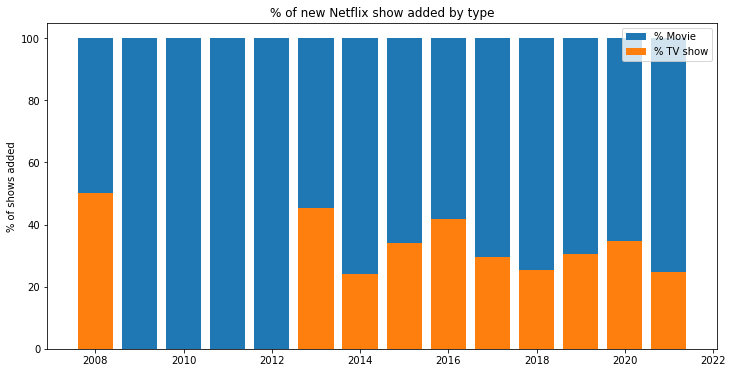

In [136]:
#Shows added by type
show_type_year = pd.pivot_table(data, values='show_id', index=data['datetime_added'].dt.year, columns='type', \
                                         aggfunc='count', fill_value = 0)
show_type_year['total'] = show_type_year['Movie'] + show_type_year['TV Show']
show_type_year['% TV show'] = (show_type_year['TV Show'] / show_type_year['total']) * 100
show_type_year['% Movie'] = 100

#print(show_type_year)

list_type = ['% Movie', '% TV show']

plt.figure(figsize=(12,6))
for show_type in list_type:
    plt.bar(show_type_year.index, show_type_year[show_type], label=show_type)

plt.title('% of new Netflix show added by type')
plt.legend()
plt.ylabel('% of shows added')
plt.show()

<h2>Netflix shows added by rating of show</h2>
<h6>Most shows added to Netflix are rated for mature audiences (TV-MA) and TV-PG (Parental Guidence suggested)</h6> 
<h6>TV shows rated for all children were added in a significant amount in 2020.</h6> 

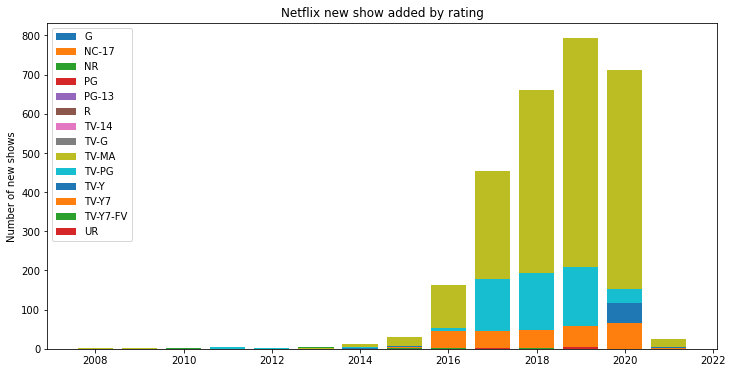

In [119]:
#Shows added by rating
show_rating_year = pd.pivot_table(data, values='show_id', index=data['datetime_added'].dt.year, columns='rating', \
                                         aggfunc='count', fill_value = 0)
#print(show_rating_year)

fig, ax = plt.subplots(figsize=(12,6))
for rating in show_rating_year.columns:
    ax.bar(show_rating_year.index, show_rating_year[rating], label=rating, colors='')

plt.title('Netflix new show added by rating')
plt.legend()
plt.ylabel('Number of new shows')
plt.show()